# Classificação do Iris Dataset com K Nearest Neighbor

In [7]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

##### Definindo funções de auxilio

In [8]:
#Definindo função para plotar matriz de confusão
def plot_cmatrix(x):
    cmatriz = x
    cmap=plt.cm.BuPu
    normalize = False
    classes =  ["setosa","versicolor","virginica"]
    plt.imshow(cmatriz, interpolation='nearest', cmap=cmap)
    plt.title('Matriz de confusao')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cmatriz.max() / 2.
    for i, j in itertools.product(range(cmatriz.shape[0]), range(cmatriz.shape[1])):
        plt.text(j, i, format(cmatriz[i, j], fmt))


    plt.tight_layout()
    plt.ylabel('Verdadeiro')
    plt.xlabel('Previsto')
    plt.show()
    
#Definindo função para atribbuir uma nova coluna que faz referencia a coluna 'Species' 
#(seŕa usado para auxiliar a função plot_scatter())

def reference(x):
    result = []
    
    for i in range(len(x)):
        if x[i] == 'Iris-setosa':
            ref = 0
        elif x[i] == 'Iris-virginica':
            ref = 1
        else:
            ref = 2
        result.append(ref)
        
    return result

#Definindo função para plotar grafico de dispersão
def plot_scatter(x,y,r):
    ref = reference(r)
    plt.scatter(x,y,sizes = 15*x,c=ref,cmap='brg', alpha=0.5)
plt.show()

## Conhecendo a base dados

Fonte do Dataset: <a href="https://www.kaggle.com/uciml/iris/downloads/iris-species.zip/2" margin-left='5'>Iris-Species</a>

O **iris Dataset** é um clássico do estudo de Ciencia de Dados e Machine Learning. 
Nesse estudo de caso o objetivo é, através da base de dados, fazer a **classificação** da Flor iris (ou Flor de lis) que possue variações. O tipo da flor depende da largura e altura de suas pétalas e sépalas.


<img width="450px" src="assets/imgs/iris-machinelearning.png"/>

<a href="https://www.datacamp.com/community/tutorials/machine-learning-in-r" margin-left='5%'>Fonte da imagem</a>

In [9]:
#recebendo dataset
data = pd.read_csv('assets/dataset/Iris.csv')
#exibindo as primeiras linhas do dataset
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Dados**

* SepalLengthCm: comprimento da sépala, numérico
* SepalWidthCm: largura da sépala, numérico
* PetalLengthCm	: comprimento da pétala, numérico
* PetalWidthCm: largura da pétala, numérico
* Species: Especies, Categórico
    * iris-Setosa
    * iris-Versicolor
    * iris-Virginica



In [10]:
#tamanho do dataset
n_linhas, n_colunas = data.shape
print(f'Existem {n_linhas} linhas e {n_colunas} colunas')

Existem 150 linhas e 6 colunas


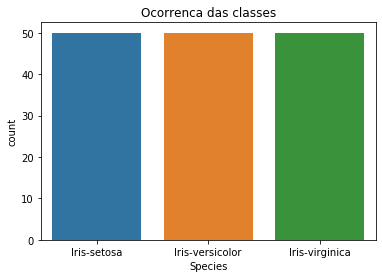

In [11]:
#plotando ocorencias de cada classe
plt.title('Ocorrenca das classes')
sns.countplot(data['Species'])
plt.savefig('assets/imgs/knn-ocorrencia-iris.png')
plt.show()

Em uma base de dados de tamanho **150** temos **50** ocorrencias para cada uma das **3** classes

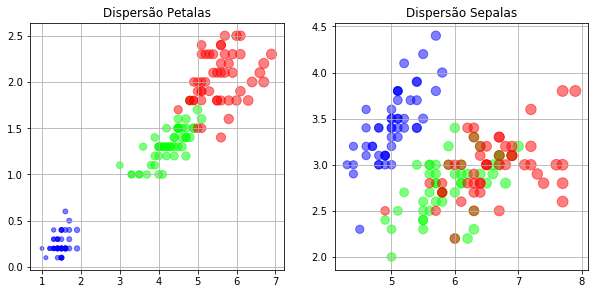

In [12]:
#plotando graficos de dispersao
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title('Dispersão Petalas')
plot_scatter(data['PetalLengthCm'],data['PetalWidthCm'],data['Species'])
plt.grid(True)
plt.subplot(222)
plt.title('Dispersão Sepalas')
plot_scatter(data['SepalLengthCm'],data['SepalWidthCm'],data['Species'])
plt.grid(True)
plt.savefig('assets/imgs/knn-dispersao-iris.png')
plt.show()

A dispersão mostra que a largura e altura das petalas são um atributos bem distintos para cada classe, enquanto que as sepalas demonstram um tipo de atrito entre duas classes

## Preparando os dados

In [13]:
#Dividindo dataset em dados de entrada(x) e saida(y) 
x,y = data,data['Species']
x = x.drop(['Id','Species'],axis=1)

#Dividindo dados de entrada(x) e saida(y) em dados de treino(x_train,y_train) e teste(x_test,y_test) 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25)

## Treinando modelo

O KNN, conhecido como K Vizinhos mais próximos é um algoritmo baseado em instâncias, ele armazena os exemplos de treinamento, e quando precisa fazer a predição ele consulta esses exemplos para procurar os K vizinhos mais próximos aos atributos da predição, como no exemplo ilustrativo:  

Veja mais detalhes na <a href="https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn" margin-left='5%'>fonte do exemplo</a>

* **Um novo conjunto precisa ser classificado**
        O algoritmo coloca os novos conjuntos junto com os exemplos já treinatos.
<img width="300px" src="assets/imgs/knn-1.jpeg"/>

* **Calculo da distancia**
        O algoritmo calcula a distancia entre os novos conjuntos e os treinados.
<img width="300px" src="assets/imgs/knn-2.jpeg"/>

* **Classificando através dos vizinhos mais próximos**
        Dependendo da escolha de quantos serão os vizinhos mais próximos, o algoritmo classifica o novo conjunto
<img width="300px" src="assets/imgs/knn-3.jpeg"/>



Nesse exemplo com **K = 3**, o conjunto será classificado como sendo da **classe B**

In [14]:
#criando modelo
K = 3 #parametro de 3 vizinhos mais próximos
modelo = KNeighborsClassifier(n_neighbors=K)
modelo.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [15]:
#prevendo dados de teste
predicoes = modelo.predict(x_test)

## Explorando resultados

In [16]:
#vendo a acurácia do modelo
acc = accuracy_score(predicoes,y_test)
print('O modelo tem %.2f de acurácia' % acc) 

O modelo tem 0.92 de acurácia


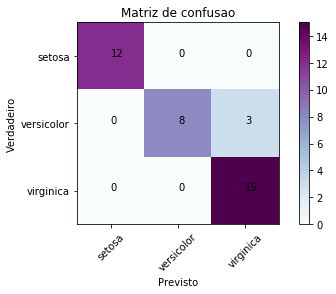

In [17]:
# Plotando matriz de confusão
matriz = confusion_matrix(y_test,predicoes)
plot_cmatrix(matriz)

Na **matriz de confusão**, os valores da **diagonal** são os valores que foram previstos corretamente.
Em relação a diagonal os valores da **horizontal** são falsos negativos,  e da **vertical** são falsos positivos

### Teste o Algoritmo

In [56]:
altura_sep = float(input('Informe altura da Sepala: '))
largura_sep = float(input('Informe Largura da Sepala: '))
altura_pet = float(input('Informe altura da Petala: '))
largura_pet = float(input('Informe Largura da Petala: '))

entradas = [[altura_sep,largura_sep,altura_pet,largura_pet]]
tipo = modelo.predict(entradas)[0]

print('\nFlor da especie',tipo)

Informe altura da Sepala: 0.2
Informe Largura da Sepala: 1.2
Informe altura da Petala: 2.2
Informe Largura da Petala: 3.2

Flor da especie Iris-setosa
